In [56]:
import string
import collections

from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

def process_text(text, stem = True):
    #text = text.translate(None, string.punctuation)
    tokens = word_tokenize(text)
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
    return tokens

def cluster_texts(texts, clusters = 3):
    vectorizer = TfidfVectorizer(tokenizer = process_text,
                                 stop_words = stopwords.words('english'),
                                 max_df = 0.5,
                                 min_df = 0.1,
                                 lowercase = True)
 
    tfidf_model = vectorizer.fit_transform(texts)
    km_model = KMeans(n_clusters = clusters)
    km_model.fit(tfidf_model)
 
    print(tfidf_model)
    print(km_model.labels_)



    clustering = collections.defaultdict(list)
 
    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)
 
    return clustering

def loadTextFiles(deposCount, articles):
    for i in range(1, deposCount):
        text_file = open(dir + "/depos-stop/" + str(i) + ".txt", "r")
        text_data = (text_file.read().lower())
        articles.append(text_data)
        text_file.close()
 
dir = '/home/jovyan/work/'
deposCount = 64
articles = [] 
loadTextFiles(deposCount, articles)
#print(articles[1])

clusters = cluster_texts(articles, 4)
pprint(dict(clusters))



  (0, 55)	0.0251065661723038
  (0, 4)	0.020942722516903534
  (0, 322)	0.02688654368724678
  (0, 34)	0.03149409475322543
  (0, 113)	0.021752451943185147
  (0, 153)	0.02405012262320302
  (0, 458)	0.035958803682658774
  (0, 412)	0.023078288765380674
  (0, 416)	0.024566857694644444
  (0, 175)	0.035958803682658774
  (0, 7)	0.028973053539436768
  (0, 400)	0.028236983236328245
  (0, 240)	0.021340838234594504
  (0, 212)	0.05134277244735891
  (0, 141)	0.035958803682658774
  (0, 470)	0.03149409475322543
  (0, 39)	0.024566857694644444
  (0, 462)	0.035958803682658774
  (0, 166)	0.0251065661723038
  (0, 366)	0.02262006677858028
  (0, 171)	0.035958803682658774
  (0, 100)	0.05508599538962805
  (0, 453)	0.02262006677858028
  (0, 276)	0.02688654368724678
  (0, 176)	0.034679575138673
  :	:
  (62, 370)	0.04449105956197029
  (62, 266)	0.04554604519005564
  (62, 425)	0.04074112256914468
  (62, 68)	0.05182704654129055
  (62, 170)	0.060914534666929775
  (62, 64)	0.04161647639628317
  (62, 291)	0.073697695823

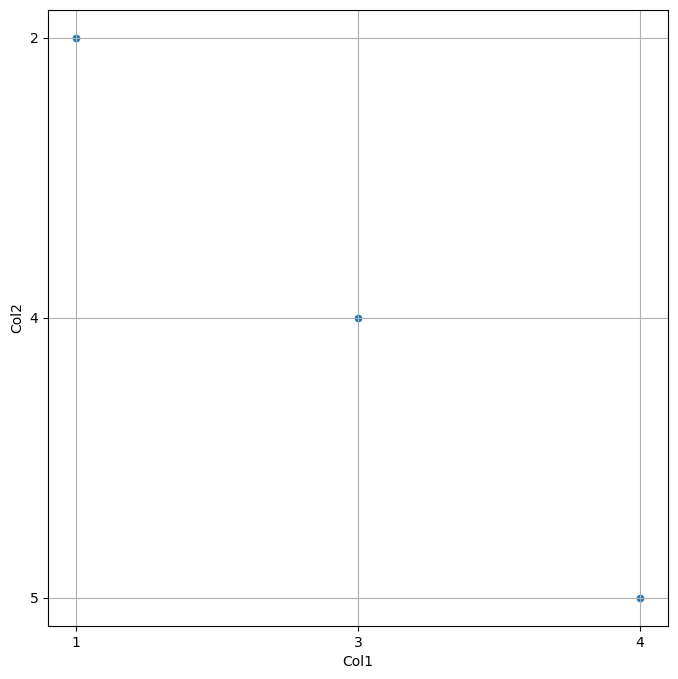

In [85]:
import pandas as pd
import numpy as np

data = np.array([['','Col1','Col2'],['Row1',1,2],['Row2',3,4],['Row3',4,5]])
dataframe = pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])


dataset = sns.load_dataset("tips")
tips = sns.load_dataset("tips")
tips.head()
plt.figure(figsize = (8, 8))
plt.grid()
sns.scatterplot(data=dataframe, x="Col1", y="Col2")
plt.show()

In [75]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]
